## Walk Through for a few Plot Examples

**0) Loading required libraries**<br>
<br>

In [2]:
import numpy as np                # numerical operations
import pandas as pd               # working with data frames
import matplotlib.pyplot as plt   # for standard plots
import seaborn as sns             # for more elaborated plots

<br>

Generating an artificial data set:<br>

In [26]:
M = 25
N = 30

X = np.zeros((N,M))

for i in range(M):
    X[:,i] = np.random.normal(np.random.uniform(-10,10),\
                              np.random.uniform(0,10),(N,1))[:,0]
Y = np.cos(X)

xr = X.reshape(N*M,1)
yr = xr + np.random.normal(0,2,(N*M,1))

Settings for size and color:<br>

In [40]:
rgb_color      = np.random.uniform(0,1,(N,3)) # 3D RGB color space
x              = np.sort(X[:,1])
rgb_edge_color = np.random.uniform(0,1,(N,3)) # 3D RGB color space
size           = abs(10*x)                    # size in pixel
m              = 'p'                          # marker style. Here: pentagram

<br>

**1) Simple Line Plots**<br>
<br>

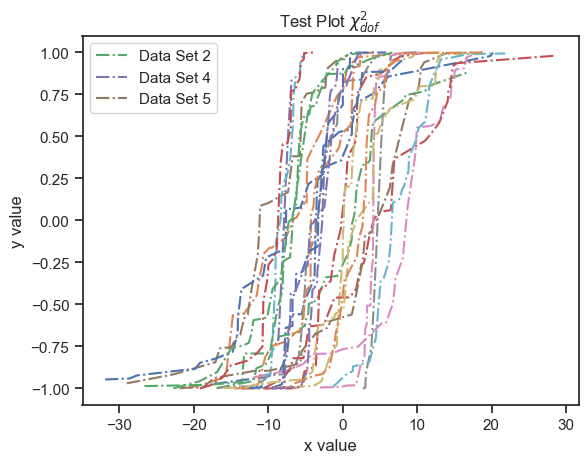

In [112]:
H      = []
Filter = [2, 4, 5]


for i in range(M):
    h = plt.plot(np.sort(X[:,i]), np.sort(Y[:,i]), '-.')
    if i in Filter:
        H += h

plt.xlabel("x value")
plt.ylabel("y value")
plt.title("Test Plot $\chi^2_{dof}$")
plt.legend(H, ['Data Set ' + str(i) for i in Filter])
plt.show()

**2) Subplots with Mosaic**<br>
<br>

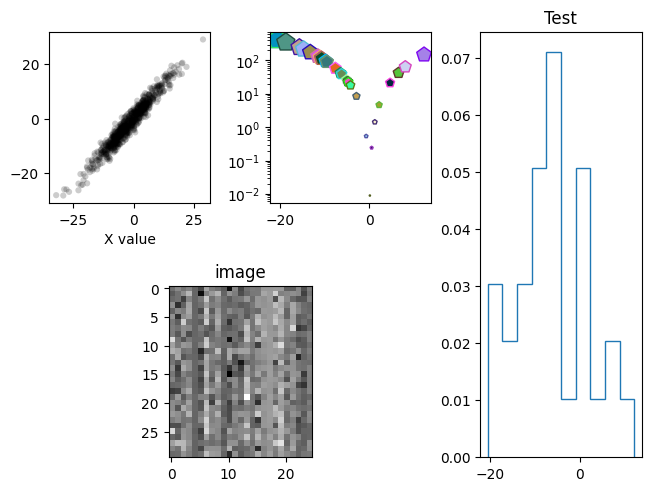

In [60]:
_, axes = plt.subplot_mosaic([['A', 'B', 'C'],\
                                 ['D', 'D', 'C']], layout = "constrained")

axes['A'].scatter(xr, yr, s = 20, c = 'k', alpha = 0.2, edgecolors = 'none')
axes['A'].set(xlabel = 'X value')

axes['B'].scatter(x, x**2, c = rgb_color, edgecolors = rgb_edge_color, marker = m, s = size)
axes['B'].set(yscale = 'log')

axes['C'].hist(x, density=True, histtype='step')
axes['C'].set(title = 'Test')

axes['D'].imshow(X, cmap = 'gray')
axes['D'].set(title = 'image')
plt.show()

<br>

**3) Plots with Seaborn**<br>
<br>

Planet Data Set:

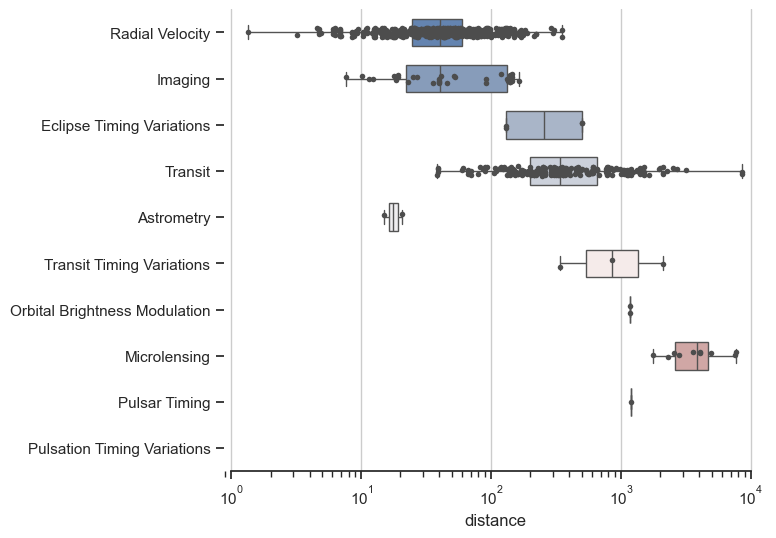

In [66]:
sns.set_theme(style = "ticks")

f, ax   = plt.subplots(figsize = (7, 6))
ax.set_xscale("log")
planets = sns.load_dataset("planets")

sns.boxplot(planets, x = "distance", y = "method", hue = "method",\
                                whis = [0, 100], width = .6, palette = "vlag")
sns.stripplot(planets, x = "distance", y = "method", size = 4, color = ".3")

ax.xaxis.grid(True)
ax.set(ylabel = "")
sns.despine(trim = True, left = True)

Correlation:

In [92]:
#loading and re-aranging data set
Data       = pd.read_csv('molecular_train_gbc.csv')
#
print(Data.iloc[:5,:])
#
#
Data.index = Data['label']
Data       = Data.drop('label', axis = 1)
#
print(Data.iloc[:5,:])

   molecular_weight  electronegativity  bond_lengths  num_hydrogen_bonds  \
0        382.601612           2.002692      3.611534                   3   
1        408.961459           2.936255      3.479041                   6   
2        239.547546           2.714128      2.639224                   8   
3        315.580280           2.855984      2.860342                   9   
4        282.521474           2.838770      2.966401                   1   

       logP      label  
0  9.826662      Toxic  
1  9.858888      Toxic  
2  6.759616  Non-Toxic  
3  8.706740  Non-Toxic  
4  7.817298  Non-Toxic  
           molecular_weight  electronegativity  bond_lengths  \
label                                                          
Toxic            382.601612           2.002692      3.611534   
Toxic            408.961459           2.936255      3.479041   
Non-Toxic        239.547546           2.714128      2.639224   
Non-Toxic        315.580280           2.855984      2.860342   
Non-Toxic

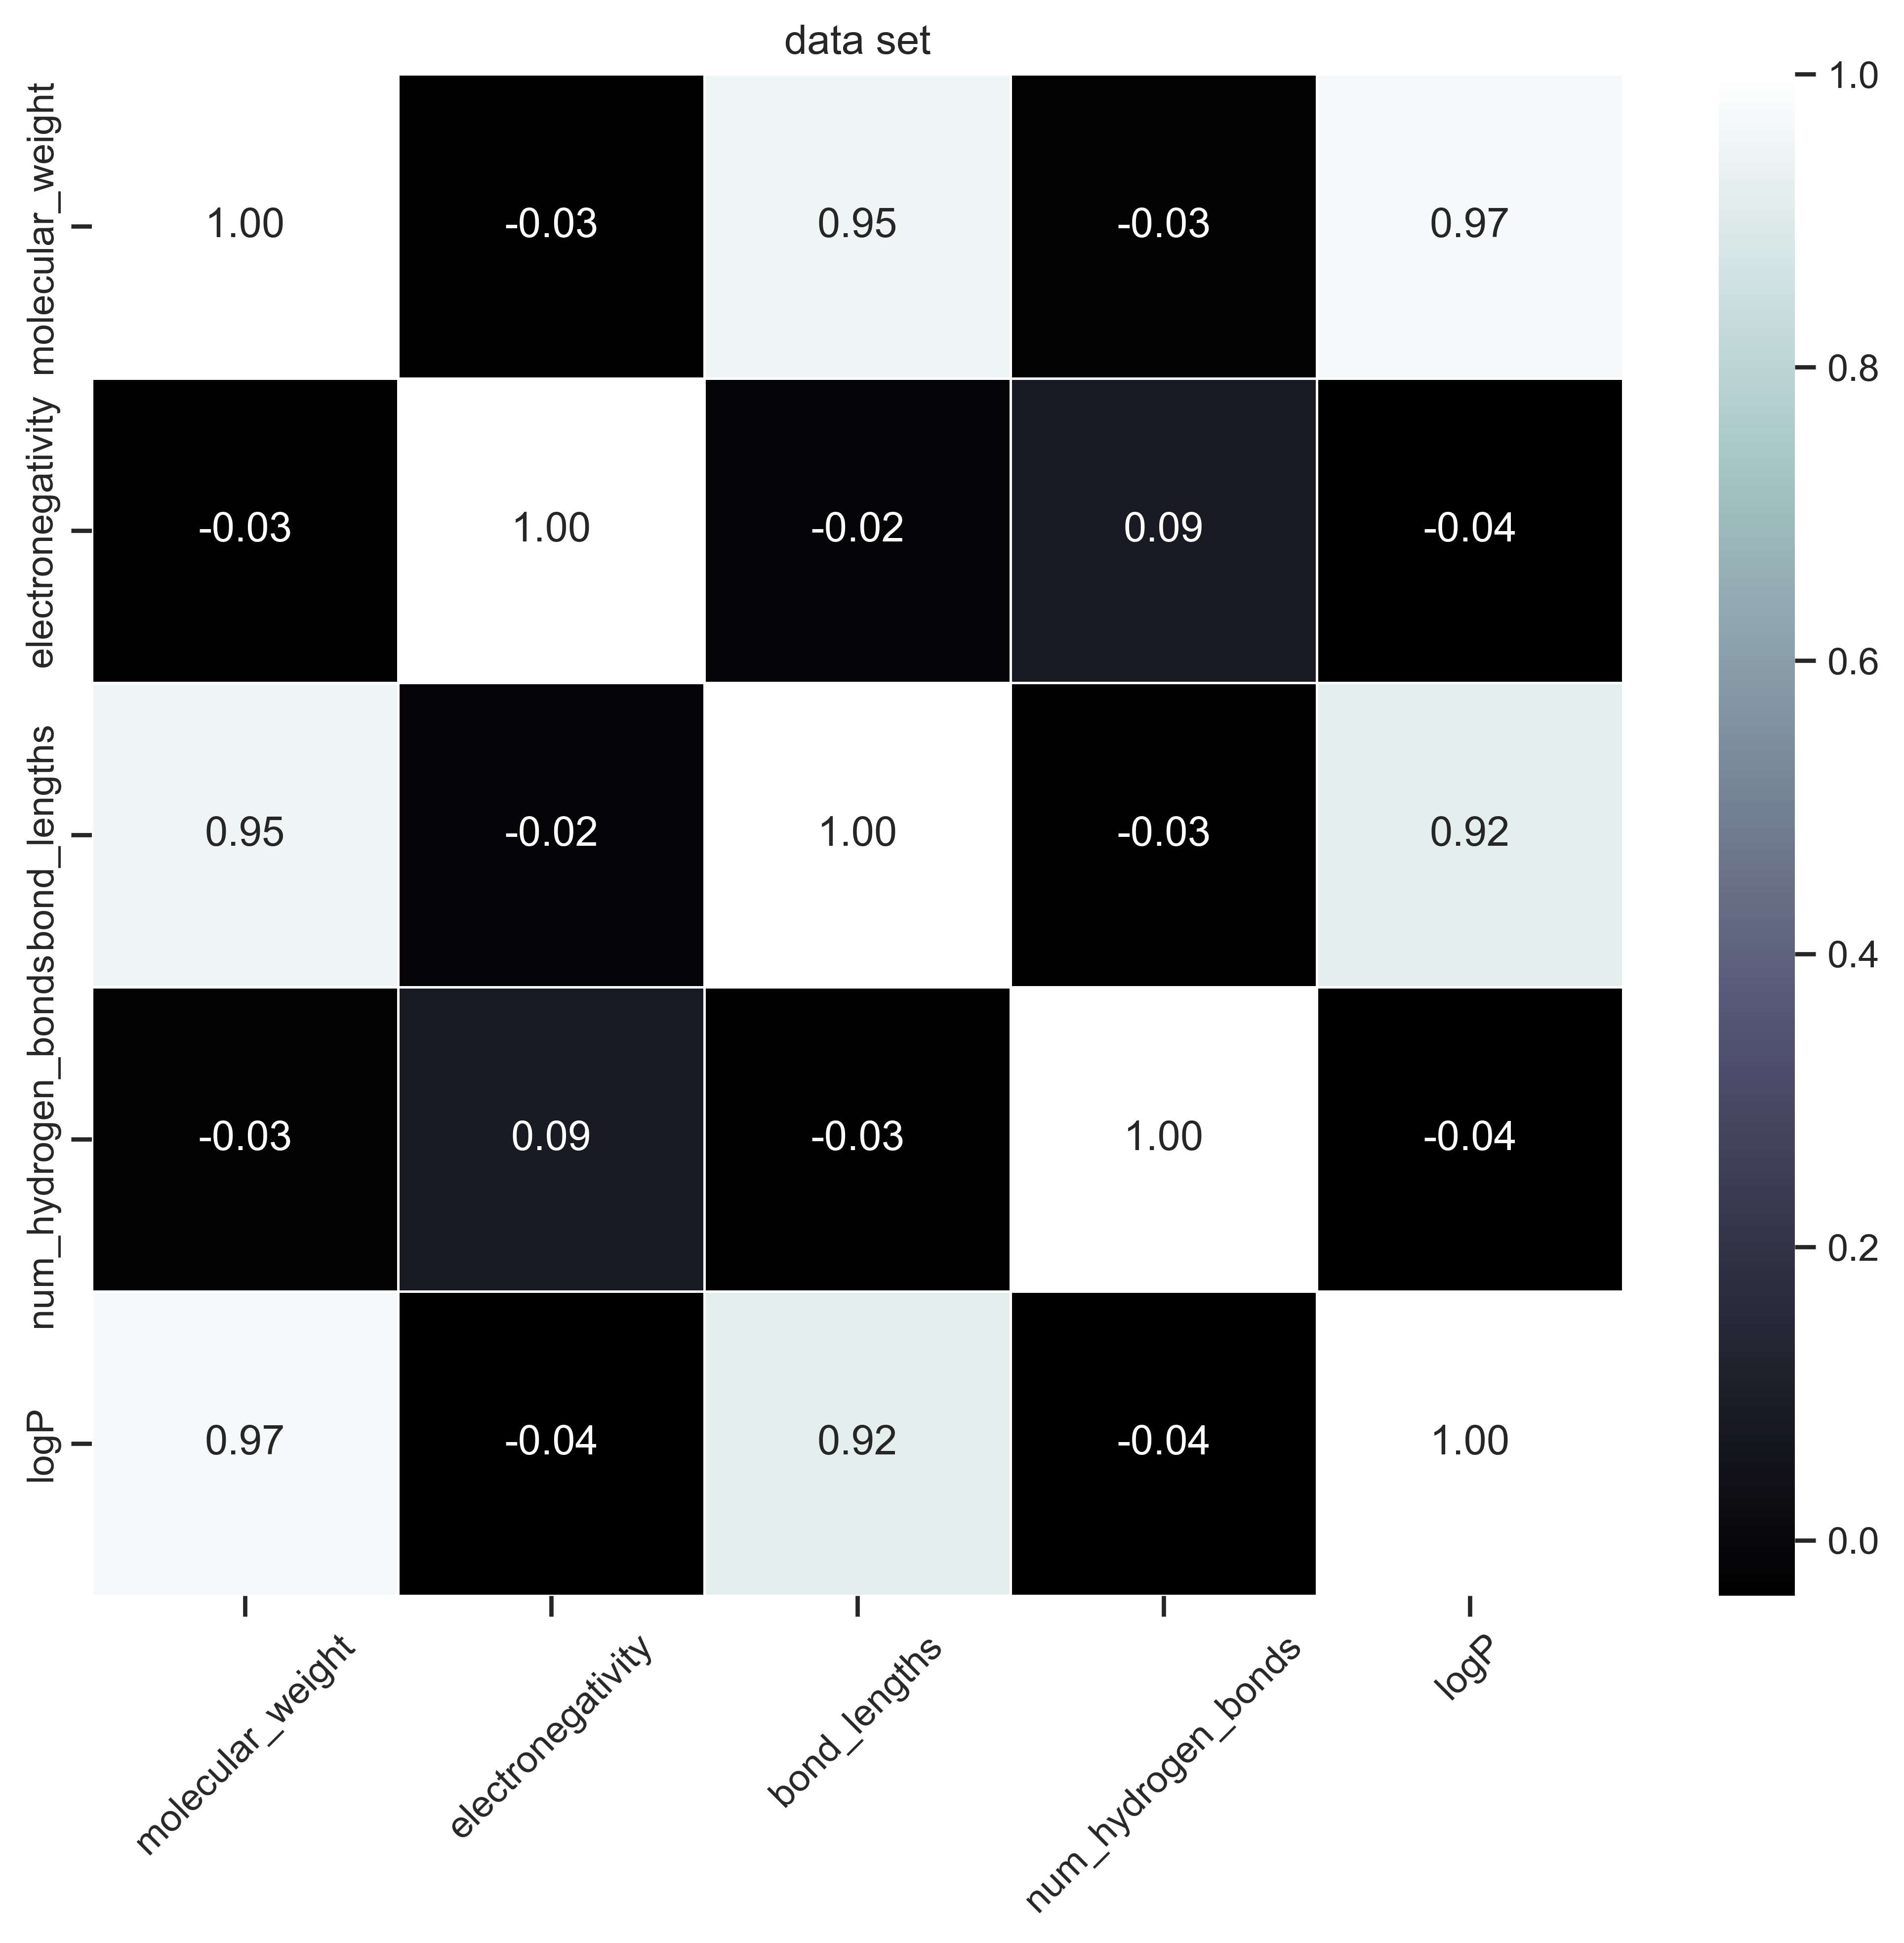

In [98]:
corr = Data.corr(method = 'pearson') # Pearsons' Correlation Coefficient

plt.figure(figsize=(10,8), dpi =500)
sns.heatmap(corr, annot = True, fmt = ".2f", linewidth = .5, cmap = 'bone')
plt.xticks(rotation = 45)
plt.title('data set')
plt.show()

KDE Plot:<br>

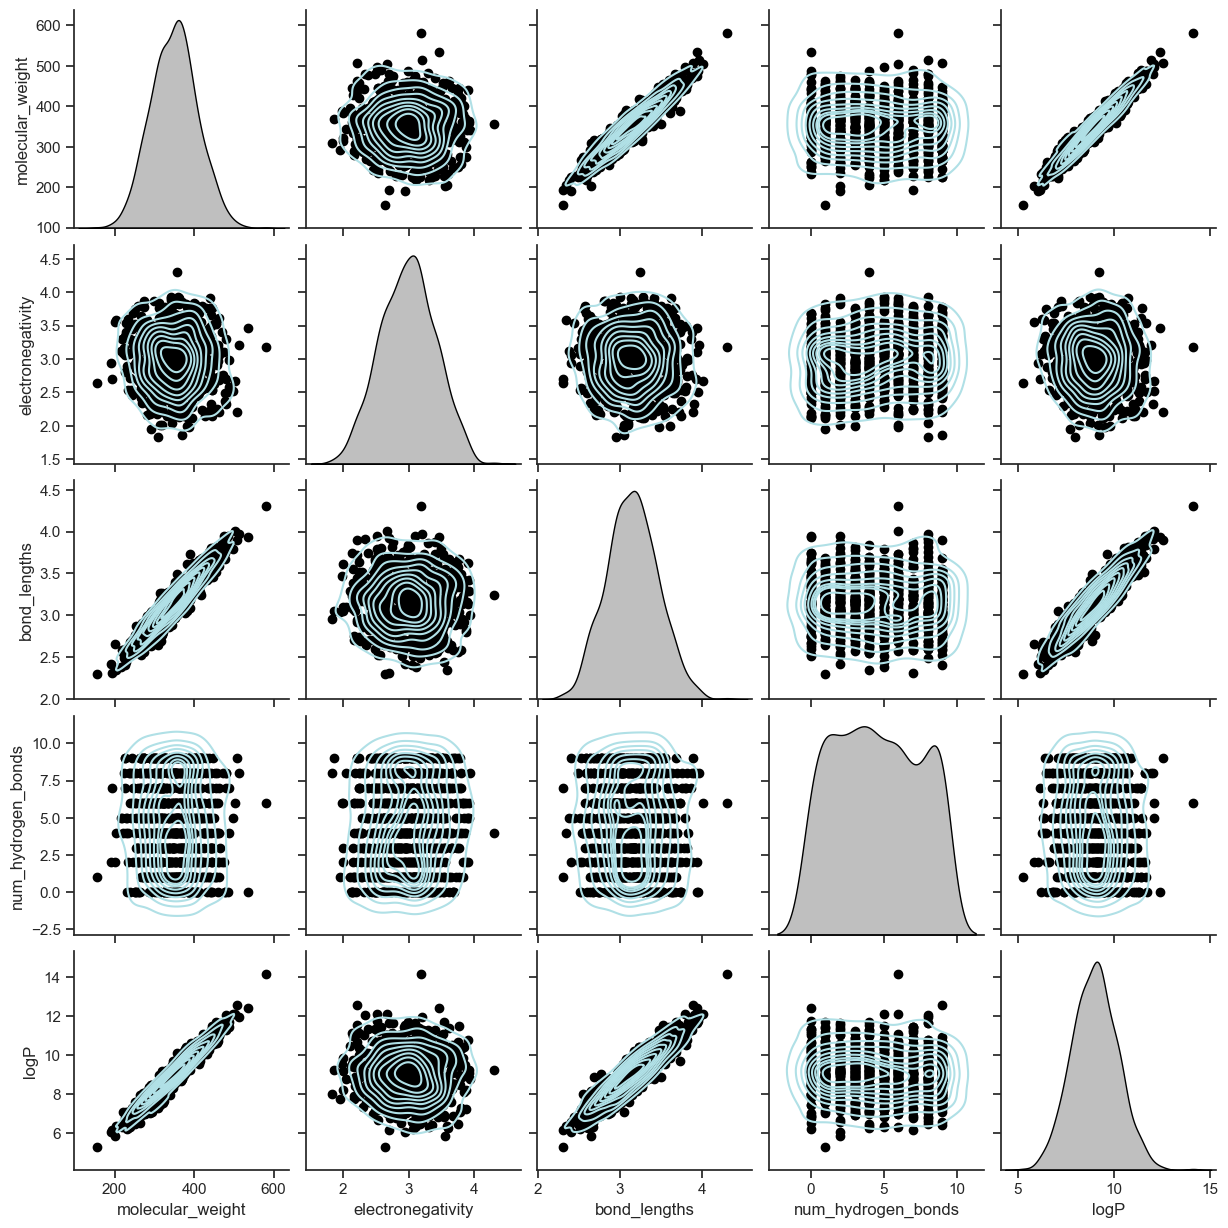

In [105]:
out = sns.pairplot(Data, kind = "kde", \
                       plot_kws = {'color':[176/255,224/255,230/255]}, \
                       diag_kws = {'color':'black'})
out.map_offdiag(plt.scatter, color = 'black')
plt.show()